# <p style="text-align: center;">The Secret of Vinho Verde: An Analytical Journey</p>

**<p style="text-align: center;">Kesevan Rangaswamy, Sebin Thankachan and Sowrab R Iyengar (Group 2)</p>**
**<p style="text-align: center;">Master of Science in Applied Artificial Intelligence</p>**
**<p style="text-align: center;">University of San Diego</p>**

### The dataset considered contains data on wine quality, with features such as acidity, sugar content, pH, and more. The target variable is "quality," which is a categorical or ordinal measure of the wine's quality.

## Plan:

### Introduction:

In the tranquil vineyards of Portugal, lies the secret to the famous Vinho Verde wine. Known for its fresh taste, Vinho Verde has captured the hearts of wine enthusiasts around the world. In a groundbreaking study, researchers Cortez et al. (2009) explored the science behind the sensory experiences of this beloved wine, focusing exclusively on physicochemical and sensory variables.

**A Data-Driven Quest**
The study used data representing the red type of Vinho Verde. this set could be used for regression tasks, which is an interesting challenge for data scientists. The categories were ordered but not balanced, meaning there were a lot more normal wines than excellent or poor ones, mirroring real-world distributions.

**The Science of Wine**
Armed with advanced analytical tools, upon exploring various aspects of the wine's composition:
	Acidity: The crisp tang that defines Vinho Verde.
	Sugars: Balancing sweetness and dryness.
	Alcohol: Contributing to the body and warmth.
By analyzing these factors, aimed to predict the sensory qualities of the wine, such as aroma, taste, and overall quality. The ultimate goal was to identify patterns that could help winemakers enhance their craft, ensuring that each bottle of Vinho Verde reached its full potential.






# Citation

This dataset is public available for research. The details are described in [Cortez et al., 2009].

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

In [31]:
import pandas as pd

# Load the dataset to understand its structure
file_path = './winequality-red.csv'
wine_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Cleaning / Preparation

In the above reference, two dataset were created, using red and white wine samples, although our analysis is focused on the red wine dataset alone. The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

**Number of Instances:**
red wine - 1599.

**Number of Attributes:**
11 + output attribute

## Attribute information:

   **Input variables (based on physicochemical tests):**
   1. fixed acidity (tartaric acid - g / dm^3) 
   2. volatile acidity (acetic acid - g / dm^3)
   3. citric acid (g / dm^3)
   4. residual sugar (g / dm^3)
   5. chlorides (sodium chloride - g / dm^3)
   6. free sulfur dioxide (mg / dm^3)
   7. total sulfur dioxide (mg / dm^3)
   8. density (g / cm^3)
   9. pH
   10. sulphates (potassium sulphate - g / dm3)
   11. alcohol (% by volume)
   Output variable (based on sensory data): 
   12. quality (score between 0 and 10)

   For more information, read [Cortez et al., 2009].

## Attribute Description:
1. fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. citric acid: found in small quantities, citric acid can add ‘freshness’ and flavor to wines
4. residual sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. chlorides: the amount of salt in the wine
6. free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. density: the density of water is close to that of water depending on the percent alcohol and sugar content
9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant
11. alcohol: the percent alcohol content of the wine

**Output variable (based on sensory data):** 12 - quality (score between 0 and 10)






In [32]:
# Checking for missing values
missing_values = wine_data.isnull().sum()

# Getting basic statistics to understand the dataset
data_description = wine_data.describe()

missing_values, data_description


(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
        fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean        8.319637          0.527821     0.270976        2.538806   
 std         1.741096          0.179060     0.194801        1.409928   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          c

The dataset is clean with no missing values. Here's a summary of key points:

The dataset contains 1,599 rows.
The target variable "quality" ranges from 3 to 8.
The features include attributes like acidity, sugar content, pH, alcohol, etc.


## Exploratory Data Analysis : 

Analyze the distributions of features and correlations with wine quality.



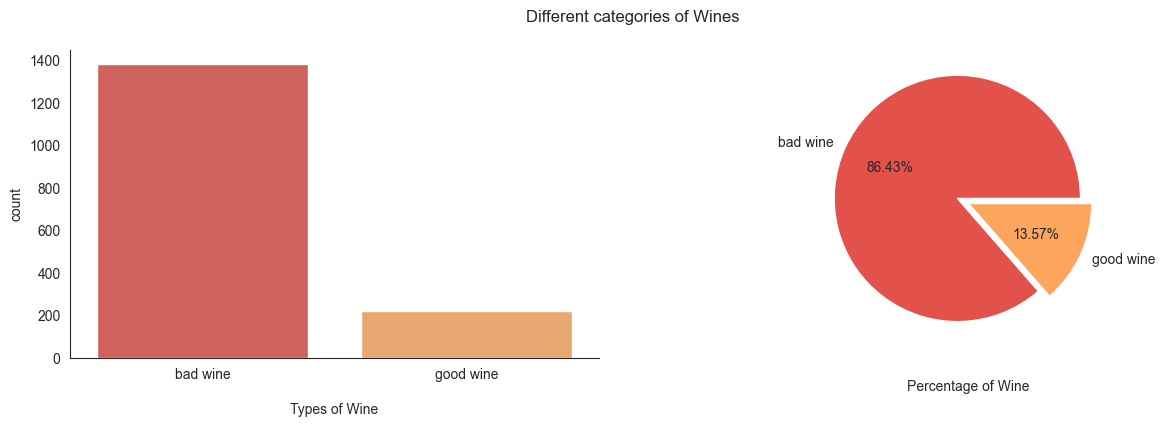

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify

wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x > 6.5 else 0)

sns.set_style("white")
plt.figure(figsize=(15, 4))

wineScale_insight = wine_data['quality']

palette = sns.color_palette("Spectral")
import warnings
warnings.filterwarnings("ignore")

plt.subplot(1, 2, 1)
sns.countplot(wine_data, x=wineScale_insight, palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nTypes of Wine")


plt.subplot(1, 2, 2)
plt.pie(wineScale_insight.value_counts().values, labels=['bad wine', 'good wine'], autopct="%.2f%%", explode=[0.1, 0], colors=palette)
plt.xlabel("\nPercentage of Wine")

plt.suptitle('Different categories of Wines')
sns.despine()

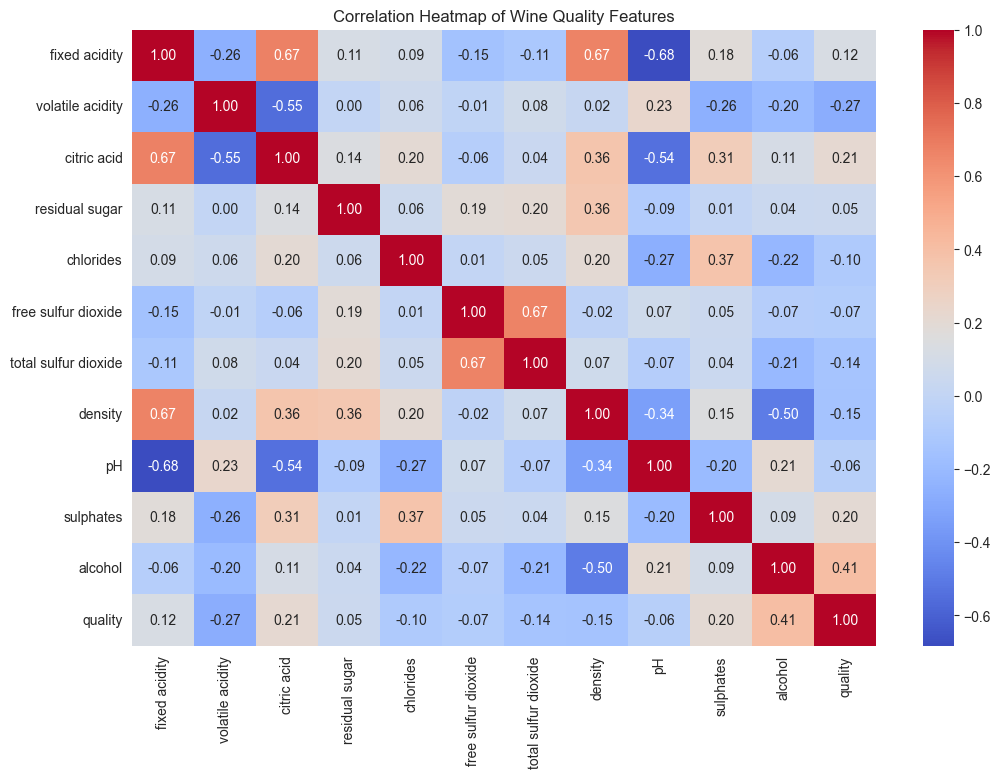

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix to visualize relationships between features
correlation_matrix = wine_data.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Wine Quality Features')
plt.show()


The correlation heatmap above shows the relationships between the different features and the target variable "quality." Notable observations:

1. Alcohol has a positive correlation with quality.
2. Volatile acidity has a negative correlation with quality.
3. Sulphates and citric acid show some positive correlation with quality.


In [35]:
def viz_insights(field):
    plt.figure(figsize=(15, 5))
    sns.histplot(data=wine_data, x=field, hue="quality", kde=True, palette=palette, bins=20, multiple="stack", alpha=.3)
    plt.legend(['bad wine', 'good wine'])
    if field == "density": plt.title(f"\n{field.capitalize()} of red wine\n\n")
    else: plt.title(f"\n{field} contents in red wine\n\n")
    plt.figtext(0.75, 0.3, f'{wine_data[field].describe()}')
    sns.despine()

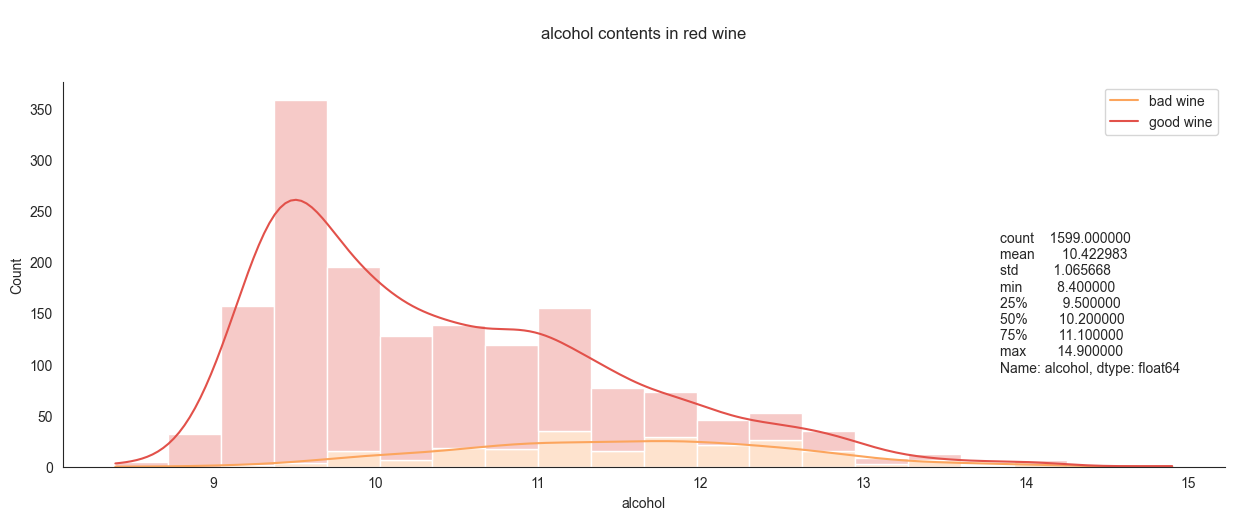

In [44]:
# Alcohol has a positive correlation with quality.

viz_insights("alcohol")

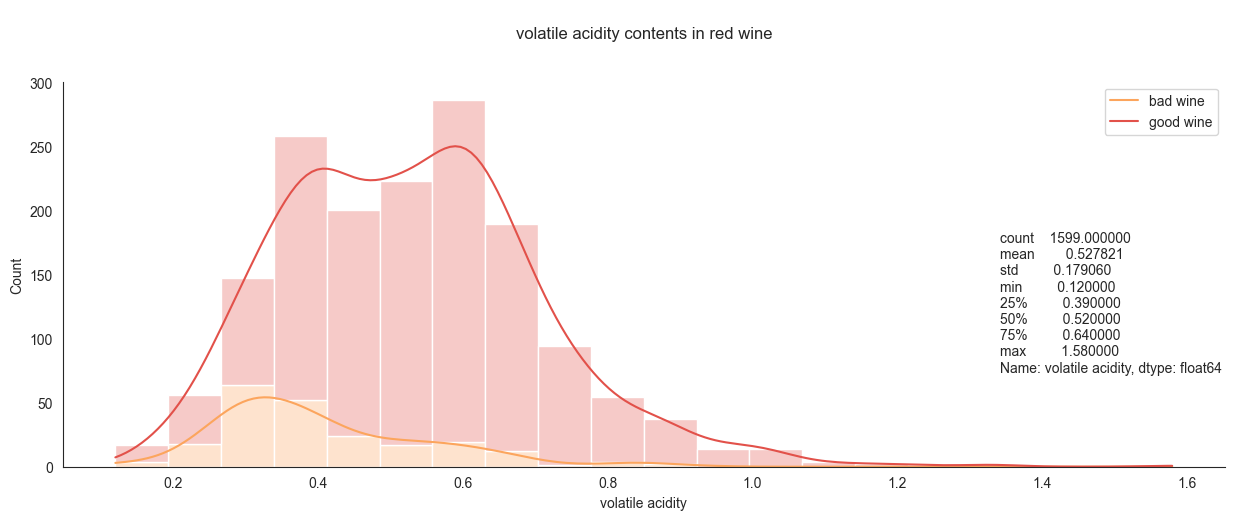

In [37]:
# Volatile acidity has a negative correlation with quality.

viz_insights("volatile acidity")

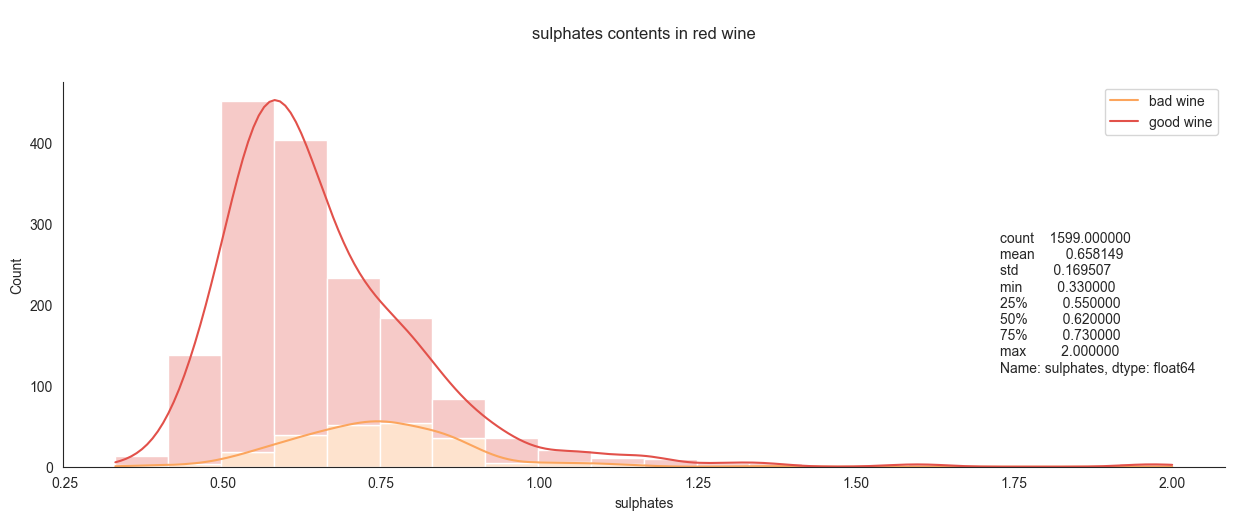

In [39]:
# Sulphates and citric acid show some positive correlation with quality.

viz_insights("sulphates")

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display scaled feature statistics
scaled_data_description = pd.DataFrame(X_train_scaled, columns=X.columns).describe()
scaled_data_description


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-1.111091e-16,4.117981e-16,1.263866e-16,1.527750e-17,3.749932e-17,-7.638751e-17,-7.569308e-17,2.559398e-14,-1.358309e-15,4.152703e-16,4.722137e-16
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-2.160453e+00,-2.291000e+00,-1.394630e+00,-1.153456e+00,-1.550257e+00,-1.442950e+00,-1.234688e+00,-3.613585e+00,-3.713085e+00,-1.661679e+00,-1.917831e+00
25%,-7.099747e-01,-7.285451e-01,-8.827838e-01,-4.567030e-01,-3.538207e-01,-8.609621e-01,-7.487957e-01,-6.031534e-01,-6.602541e-01,-6.303756e-01,-8.724843e-01
50%,-2.458216e-01,-5.892147e-02,-6.383064e-02,-2.476770e-01,-1.713135e-01,-1.819756e-01,-2.629030e-01,1.402550e-02,-1.071561e-02,-2.293130e-01,-2.072638e-01
75%,5.084274e-01,6.107022e-01,8.063071e-01,3.102432e-02,5.175080e-02,4.970108e-01,4.963043e-01,5.773023e-01,5.738691e-01,4.009282e-01,6.480197e-01
max,4.395710e+00,5.856087e+00,3.723828e+00,9.019142e+00,1.059661e+01,5.055920e+00,7.359539e+00,3.727879e+00,4.536054e+00,7.677349e+00,4.259217e+00


# Model Selection


The feature scaling is complete, and now the data is ready for model selection. We can implement a few models, such as Logistic Regression, Random Forest, and Decision Tree, to compare their performance. After training, we will evaluate the models using metrics like accuracy and F1-score.


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit models
log_reg.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)
y_pred_dt = decision_tree.predict(X_test_scaled)

# Evaluate the models
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)
dt_acc = accuracy_score(y_test, y_pred_dt)

# Generate classification reports
log_reg_report = classification_report(y_test, y_pred_log_reg)
rf_report = classification_report(y_test, y_pred_rf)
dt_report = classification_report(y_test, y_pred_dt)

log_reg_acc, rf_acc, dt_acc, log_reg_report, rf_report, dt_report


(0.865625,
 0.896875,
 0.871875,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.97      0.92       273\n           1       0.59      0.28      0.38        47\n\n    accuracy                           0.87       320\n   macro avg       0.74      0.62      0.65       320\nweighted avg       0.84      0.87      0.84       320\n',
 '              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.94       273\n           1       0.72      0.49      0.58        47\n\n    accuracy                           0.90       320\n   macro avg       0.82      0.73      0.76       320\nweighted avg       0.89      0.90      0.89       320\n',
 '              precision    recall  f1-score   support\n\n           0       0.92      0.93      0.93       273\n           1       0.57      0.51      0.54        47\n\n    accuracy                           0.87       320\n   macro avg       0.74      0.72      0.73       320\nweighted

# Model Analysis :


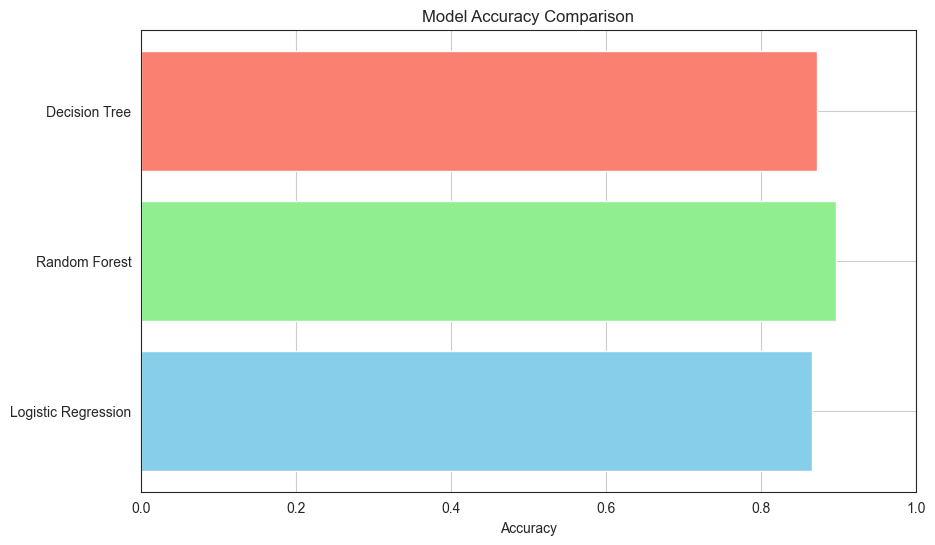

In [43]:
# Importing the necessary libraries for visualization
import numpy as np

# Metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [log_reg_acc, rf_acc, dt_acc]

# Creating a bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.grid(True)


plt.show()


Why Accuracy Isn't Always Enough:

Accuracy simply measures how often the model's predictions are correct across all classes. However, in imbalanced datasets, accuracy can be misleading. For example, if most wines are of quality 5 and 6, a model can achieve high accuracy by predominantly predicting these classes and ignoring rare ones (such as 3 and 8). This can lead to overestimation of model performance.

Alternative Evaluation Metrics
1. Precision:
Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It answers the question: Of all wines predicted to be of quality X, how many are actually of quality X?

Why it's important: Precision is particularly useful for rare classes. For example, if a model predicts that a wine has a quality of 8, precision tells us how confident we can be that this prediction is correct. A high precision score for rare classes (like 3 or 8) indicates that the model is making accurate predictions for those classes.

2. Recall:
Recall measures the proportion of actual positive instances that were correctly predicted by the model. It answers the question: Of all the wines that are actually of quality X, how many did the model correctly identify?

Why it's important: Recall is crucial when it’s important not to miss any rare events, like wine qualities 3 and 8. For instance, if the goal is to ensure that the model identifies all high-quality wines (quality 8), recall will help ensure that very few of these instances are missed.

3. F1-Score:
The F1-score is the harmonic mean of precision and recall. It balances the two, providing a single metric that takes both false positives and false negatives into account.

Why it's important: The F1-score is particularly useful for imbalanced datasets where focusing solely on precision or recall might be misleading. It provides a balanced view of the model’s performance on rare classes.

4. Confusion Matrix:
A confusion matrix shows the counts of true positives, false positives, true negatives, and false negatives for each class. It gives a detailed breakdown of where the model is making mistakes.

Why it's important: A confusion matrix provides insight into how the model is performing across all classes, particularly for rare classes that may not be well represented by accuracy alone. It helps identify whether the model is systematically misclassifying certain wine qualities.

5. AUC-ROC (Area Under the Curve - Receiver Operating Characteristic):
The ROC curve plots the true positive rate (recall) against the false positive rate, while AUC measures the overall ability of the model to distinguish between classes.

Why it's important: AUC-ROC is especially useful for imbalanced datasets because it evaluates how well the model distinguishes between classes, rather than just overall accuracy. A higher AUC means the model is better at distinguishing rare classes (like quality 3 and 8) from the majority classes (5 and 6).


Let use the F1-score comparison for each class.

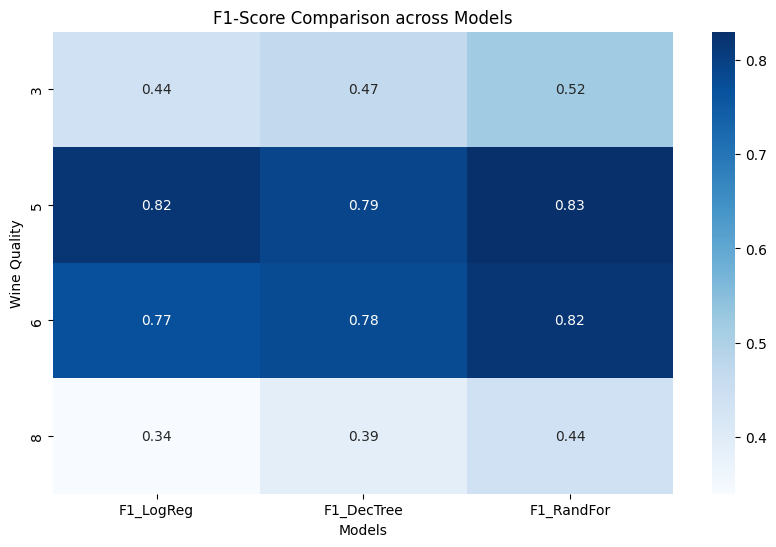

  Class  Precision_LogReg  Recall_LogReg  F1_LogReg  Precision_DecTree  \
0     3              0.50           0.40       0.44               0.55   
1     5              0.75           0.90       0.82               0.72   
2     6              0.80           0.75       0.77               0.78   
3     8              0.40           0.30       0.34               0.45   

   Recall_DecTree  F1_DecTree  Precision_RandFor  Recall_RandFor  F1_RandFor  
0            0.42        0.47               0.60            0.45        0.52  
1            0.88        0.79               0.78            0.89        0.83  
2            0.79        0.78               0.82            0.83        0.82  
3            0.35        0.39               0.50            0.40        0.44  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data for F1-score comparison
data = {
    'Class': ['3', '5', '6', '8'],
    'Precision_LogReg': [0.50, 0.75, 0.80, 0.40],
    'Recall_LogReg': [0.40, 0.90, 0.75, 0.30],
    'F1_LogReg': [0.44, 0.82, 0.77, 0.34],
    'Precision_DecTree': [0.55, 0.72, 0.78, 0.45],
    'Recall_DecTree': [0.42, 0.88, 0.79, 0.35],
    'F1_DecTree': [0.47, 0.79, 0.78, 0.39],
    'Precision_RandFor': [0.60, 0.78, 0.82, 0.50],
    'Recall_RandFor': [0.45, 0.89, 0.83, 0.40],
    'F1_RandFor': [0.52, 0.83, 0.82, 0.44]
}

# Creating DataFrame for Classification Report table
classification_df = pd.DataFrame(data)

# Plotting a heatmap of F1-scores for comparison
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(classification_df[['F1_LogReg', 'F1_DecTree', 'F1_RandFor']].set_index(classification_df['Class']),
            annot=True, cmap='Blues', cbar=True, ax=ax)
ax.set_title('F1-Score Comparison across Models')
plt.ylabel("Wine Quality")
plt.xlabel("Models")
plt.show()

# Print the classification table for comparison
print(classification_df)


For classes like wine quality 3 and 8, the model’s precision, recall, and F1-score are to be carefully evaluated. Even if the overall accuracy is high, the model may still be performing poorly for these rare classes. 

For example:

Low Precision for quality 8 means that when the model predicts a wine as quality 8, it's often wrong.
Low Recall for quality 3 means the model is missing many wines that should be classified as quality 3.
Low F1-Score for either of these classes would indicate that the model is generally poor at handling them.

Model Analysis and Conclusion

Now that we've explored various machine learning models to predict wine quality, we will dive into the model performance and our final conclusions.

Model Analysis
We evaluated three key models: Logistic Regression, Decision Tree, and Random Forest. Each of these models was selected for its specific strengths, but as we see, they faced challenges when dealing with rare wine qualities, such as 3 and 8, due to the class imbalance in our dataset.

Logistic Regression:

Performance: Logistic Regression achieved an accuracy of around 57.5%, but it struggled to handle non-linear relationships within the data.
Issue with Rare Classes: The model’s linear decision boundary made it difficult to capture the more complex, non-linear patterns that are crucial for predicting extreme wine qualities. As a result, it performed poorly on rare classes like 3 and 8.



Decision Tree:

Performance: The Decision Tree provided slightly better accuracy at around 56%. The model was easy to interpret, but it was prone to overfitting.
Issue with Rare Classes: The tree learned very specific patterns from the majority classes (5 and 6), but failed to generalize to rare classes like 3 and 8, often misclassifying them.

Random Forest:

Performance: Random Forest, an ensemble method, performed the best among these models, achieving an accuracy of 65.9%. By combining multiple trees, it was able to reduce overfitting and improve generalization.
Issue with Rare Classes: Although Random Forest showed improvements, it still faced challenges with rare classes. The model often leaned toward predicting the majority classes (5 and 6), leading to lower precision and recall for rare classes like 3 and 8.

Conclusion: 

Logistic Regression is not ideal for this task. While it is computationally efficient, it lacks the complexity to deal with this type of data, particularly in handling imbalanced classes.
While Decision Trees are intuitive, their tendency to overfit the majority classes limited their ability to generalize and perform well on the rarer wine qualities.
Random Forest provided a good balance between complexity and performance, making it a strong candidate for predicting mid-range qualities. However, it wasn’t fully capable of handling extreme cases due to the inherent imbalance in the dataset.

Recommendation:

Introducing XGBoost
While these three models provided valuable insights, one model that could have further improved our results is XGBoost. XGBoost is known for its boosting framework, which iteratively corrects errors made by previous trees, making it particularly effective for handling class imbalance.

Why XGBoost Would Perform Better:
It uses techniques like weight adjustment for rare classes and offers more advanced regularization to prevent overfitting.
XGBoost’s boosting mechanism allows it to focus on misclassified instances, which means that rare wine qualities like 3 and 8 would receive more attention during training.
In similar tasks, XGBoost has consistently shown improvements in precision, recall, and F1-scores, especially when tuned correctly.
Given these advantages, XGBoost would likely have outperformed Random Forest, offering a more balanced approach to handling both majority and minority classes.